In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/audit.csv

--2022-03-22 11:22:21--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/audit.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.86
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39965 (39K) [text/csv]
Saving to: ‘audit.csv.1’

audit.csv.1         100%[===================>]  39.03K   158KB/s    in 0.2s    

2022-03-22 11:22:22 (158 KB/s) - ‘audit.csv.1’ saved [39965/39965]



STEP 0
### CARICO DEL DATASET E DEFINIZIONE DEL PROBLEMA (classification o regression)
# chi è la target?

In [3]:
df = pd.read_csv('audit.csv')

In [4]:
df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


è un problema di classificazione

##EXPLORATORY DATA ANALYSIS

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,776.0,20.184536,24.319017,1.85,2.3700,3.890,55.5700,59.85
PARA_A,776.0,2.450194,5.678870,0.00,0.2100,0.875,2.4800,85.00
SCORE_A,776.0,3.512887,1.740549,2.00,2.0000,2.000,6.0000,6.00
PARA_B,776.0,10.799988,50.083624,0.00,0.0000,0.405,4.1600,1264.63
SCORE_B,776.0,3.131443,1.698042,2.00,2.0000,2.000,4.0000,6.00
TOTAL,776.0,13.218481,51.312829,0.00,0.5375,1.370,7.7075,1268.91
numbers,776.0,5.067655,0.264449,5.00,5.0000,5.000,5.0000,9.00
Marks,776.0,2.237113,0.803517,2.00,2.0000,2.000,2.0000,6.00
Money_Value,775.0,14.137631,66.606519,0.00,0.0000,0.090,5.5950,935.03
MONEY_Marks,776.0,2.909794,1.597452,2.00,2.0000,2.000,4.0000,6.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

la Location_ID è una stringa, vado su: sono numeri, ma evidentemente almeno un valore è stato inserito una stringa

In [7]:
df.isnull().sum().sum()==0
# cerco i null, chiedo se è zero. ma viene false, allora ce ne sono (-> dropna()) per eliminarli

False

##STEP 2 
BILANCIAMENTO DEL DATASET

In [8]:
df['Risk'].value_counts()

1    486
0    290
Name: Risk, dtype: int64

1 -> Rischio,
0 -> non Rischio

quindi non è bilanciatissima, ma c'è di peggio ( se stai sui 2/3 non ci sono grossi problemi)

In [16]:
df.dropna()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


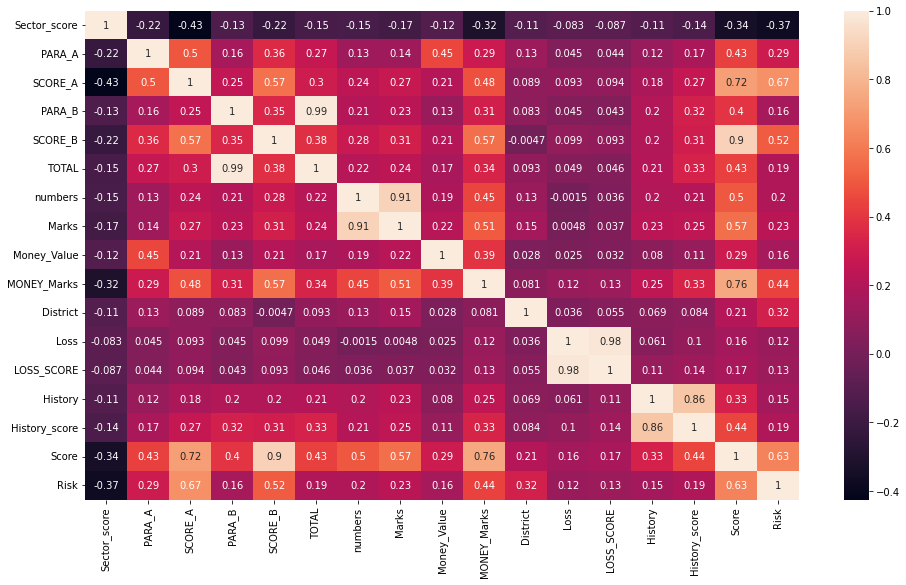

In [19]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True)

###STEP 3 

In [ ]:
#separating the data and the labels